
# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes



## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)


In [2]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0



## Task 2: Visualize the Dataset


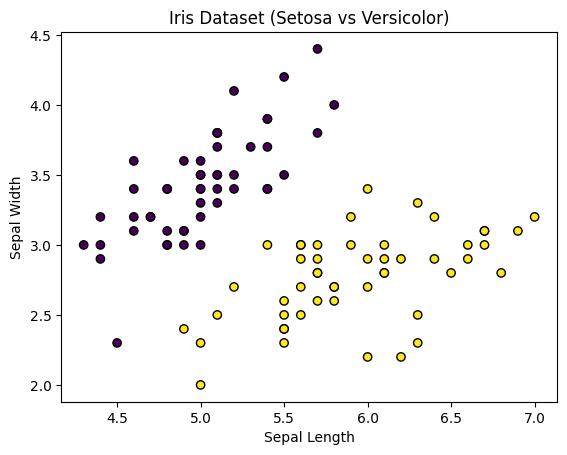

In [3]:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()


## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=3: {accuracy:.2f}")


print("\nFirst 10 predictions:")
print(f"Predicted: {y_pred[:10]}")
print(f"Actual:    {y_test[:10]}")

Training set size: (70, 2)
Test set size: (30, 2)
Accuracy with k=3: 1.00

First 10 predictions:
Predicted: [0 0 1 0 0 1 1 1 1 0]
Actual:    [0 0 1 0 0 1 1 1 1 0]



## Task 4: Predictions for Different Values of k


k= 1 | Train Accuracy: 1.000 | Test Accuracy: 1.000
k= 3 | Train Accuracy: 1.000 | Test Accuracy: 1.000
k= 5 | Train Accuracy: 1.000 | Test Accuracy: 1.000
k= 7 | Train Accuracy: 1.000 | Test Accuracy: 1.000
k= 9 | Train Accuracy: 1.000 | Test Accuracy: 1.000
k=11 | Train Accuracy: 1.000 | Test Accuracy: 1.000
k=13 | Train Accuracy: 1.000 | Test Accuracy: 1.000
k=15 | Train Accuracy: 1.000 | Test Accuracy: 0.967


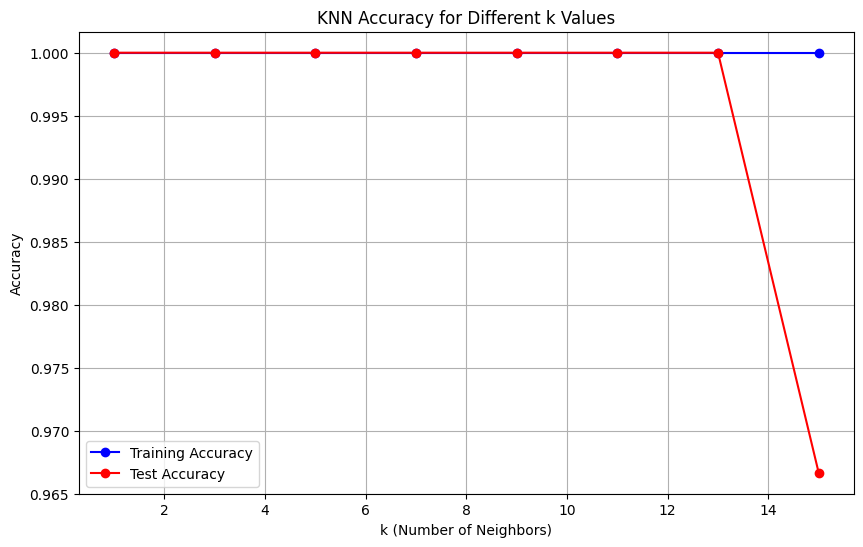


Best k value: 1 with test accuracy: 1.000


In [5]:
import matplotlib.pyplot as plt
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
train_accuracies = []
test_accuracies = []
for k in k_values:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"k={k:2d} | Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f}")
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, 'bo-', label='Training Accuracy')
plt.plot(k_values, test_accuracies, 'ro-', label='Test Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()


best_k_idx = test_accuracies.index(max(test_accuracies))
best_k = k_values[best_k_idx]
best_accuracy = test_accuracies[best_k_idx]
print(f"\nBest k value: {best_k} with test accuracy: {best_accuracy:.3f}")


## Task 5: Decision Boundary Function (Provided)


In [11]:

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()



## Task 6: Decision Boundary for Different Values of k


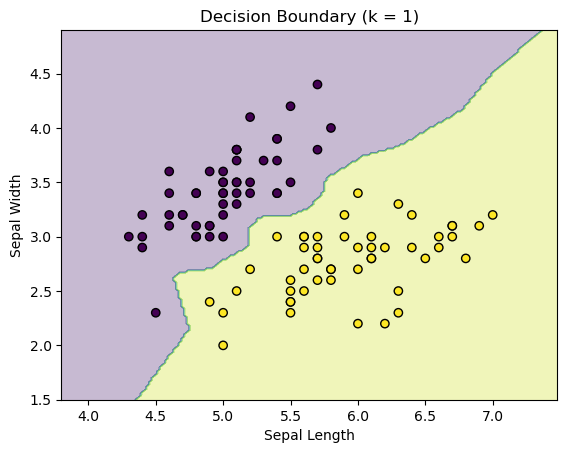

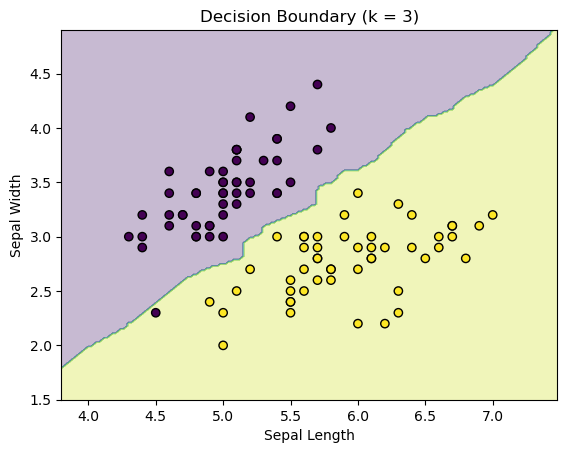

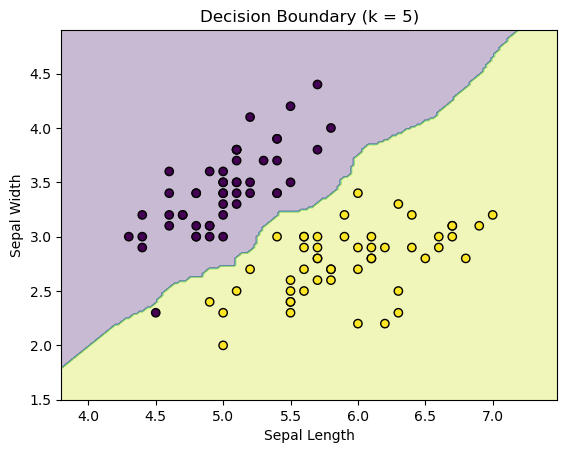

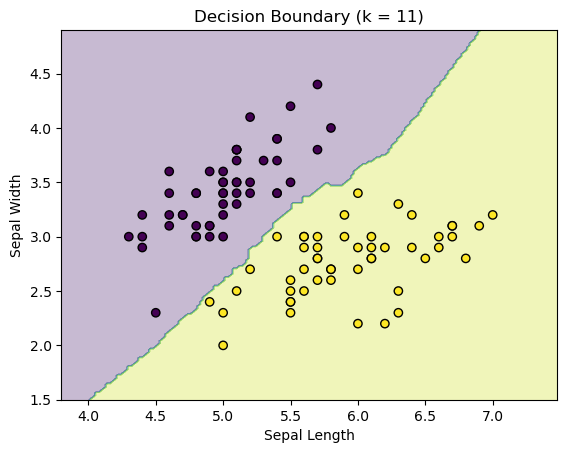

In [12]:

for k in [1, 3, 5, 11]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")



## Task 7: Effect of Distance Metric
Fix k = 5 and compare Euclidean vs Manhattan distance


In [ ]:
Plot a decision boundary when using k=5 and change the distance

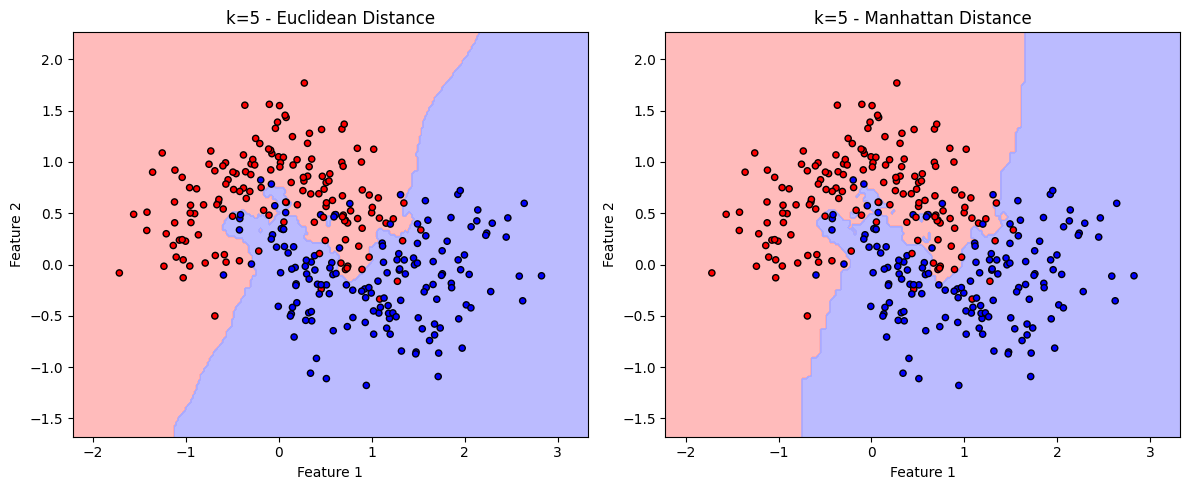

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons  
from matplotlib.colors import ListedColormap
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)
k = 5
knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
knn_euclidean.fit(X, y)
knn_manhattan.fit(X, y)
h = 0.02  
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_euc = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()])
Z_man = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()])
Z_euc = Z_euc.reshape(xx.shape)
Z_man = Z_man.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Euclidean
axes[0].contourf(xx, yy, Z_euc, cmap=cmap_light, alpha=0.8)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
axes[0].set_title(f'k={k} - Euclidean Distance')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Manhattan
axes[1].contourf(xx, yy, Z_man, cmap=cmap_light, alpha=0.8)
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
axes[1].set_title(f'k={k} - Manhattan Distance')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


## Task 8: Observations (Answer in Markdown)
1. How do predictions change as k increases?
2. Which k value gives the most complex decision boundary?
3. Why does k = 1 behave differently?
4. How does distance metric affect results?
5. Which configuration would you choose and why?


1. **How do predictions change as k increases?**  
As *k* increases, predictions become smoother and less sensitive to noise. Small k values react strongly to individual data points, while larger k values average over more neighbors, leading to more stable predictions.

2. **Which k value gives the most complex decision boundary?**  
*k = 1* gives the most complex and irregular decision boundary because each point is classified based on its nearest neighbor.

3. **Why does k = 1 behave differently?**  
Because it relies on a single nearest neighbor, it perfectly fits the training data and is highly sensitive to noise (overfitting).

4. **How does distance metric affect results?**  
Euclidean distance produces circular decision regions, while Manhattan distance creates diamond-shaped regions. This changes how neighbors are selected and can slightly alter predictions.

5. **Which configuration would you choose and why?**  
*k = 5 with Euclidean distance* is a good balance between bias and variance, providing smooth decision boundaries and better generalization.